In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
path = 'KPMG_VI_New_raw_data.xlsx'

#### Prepare CustomerDemographic table

In [4]:
demog = pd.read_excel(path, sheet_name='CustomerDemographic')
demog.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [82]:
demog_copy = demog.copy()
demog_copy.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [83]:
demog_copy['gender'].unique().tolist()

['F', 'Male', 'Female', '247', 'U', 'Femal', 'M']

In [84]:
# we will replace all 'F', 'Femal' to be 'Female'
# we will replace all 'M' to be 'Male'
demog_copy['gender'].replace({'F' : 'Female', 'Femal' : 'Female', 'M' : 'Male'}, inplace=True)
demog_copy.gender.unique()

array(['Female', 'Male', '247', 'U'], dtype=object)

In [85]:
demog_copy.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [86]:
# create age variable out of DOB
demog_copy['age'] = demog_copy['DOB'].map(lambda x: x.year)
demog_copy.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1961.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,1977.0


In [87]:
# change the years in 'age' to age values in number of years
# dividing it by the year 2018 as we assume to be analysing for the year 2018
demog_copy['age'] = 2018 - demog_copy['age']
demog_copy.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,65.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,38.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,64.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,57.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,41.0


In [88]:
demog_copy.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age
count,4000.000000,4000.000000,3913.000000,3913.000000
mean,2000.500000,48.890000,10.657041,40.969333
std,1154.844867,28.715005,5.660146,12.796387
min,1.000000,0.000000,1.000000,16.000000
25%,1000.750000,24.000000,6.000000,31.000000
50%,2000.500000,48.000000,11.000000,41.000000
75%,3000.250000,73.000000,15.000000,50.000000
max,4000.000000,99.000000,22.000000,175.000000


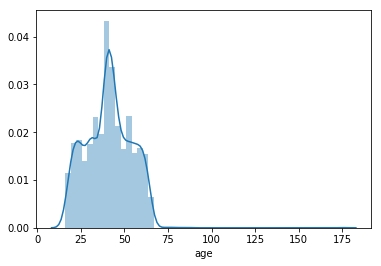

In [89]:
sns.distplot(demog_copy['age'].dropna())

In [90]:
# replace all values of age older than 75 years old
for i in demog_copy['age']:
    if i > 75:
        demog_copy['age'].replace(to_replace=i, value=np.nan, inplace=True)
demog_copy.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age
count,4000.000000,4000.000000,3913.000000,3909.000000
mean,2000.500000,48.890000,10.657041,40.903044
std,1154.844867,28.715005,5.660146,12.568566
min,1.000000,0.000000,1.000000,16.000000
25%,1000.750000,24.000000,6.000000,31.000000
50%,2000.500000,48.000000,11.000000,41.000000
75%,3000.250000,73.000000,15.000000,50.000000
max,4000.000000,99.000000,22.000000,75.000000


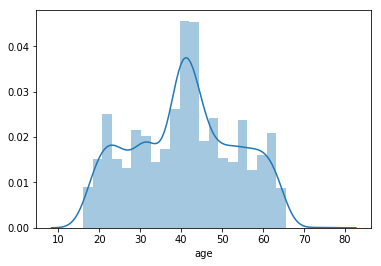

In [91]:
sns.distplot(demog_copy['age'].dropna())

In [92]:
# create age group variable of 16-19 teen, 20-29 young adult, 30-50 adult, 51-64 elder, 65-80 senior
bins = [16, 20, 30, 51, 65, 75]
labels = ['Teen', 'Young Adult', 'Adult', 'Elder', 'Senior']
demog_copy['age_group'] = pd.cut(demog_copy['age'], bins=bins, labels=labels, right=False)
demog_copy.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,65.0,Senior
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,38.0,Adult
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,64.0,Elder
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,57.0,Elder
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,41.0,Adult


##### check this out later, to get more insight with age and profit
sns.boxplot(x='deceased_indicator', y='age', data=demog_copy)

In [93]:
demog_copy['gender'].replace({'247' : np.nan, 'U' : np.nan}, inplace=True)
demog_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 3911 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
age                                    3909 non-null float64
age_group                              3908 non-null category
dtypes: category(1), datetime64[ns](1), flo

#### Prepare the customer address table

In [5]:
addr = pd.read_excel(path, sheet_name='CustomerAddress')

In [102]:
addr_copy = addr.copy()
addr_copy.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,0 Holy Cross Court,4211,QLD,Australia,9
3,4,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,9 Oakridge Court,3216,VIC,Australia,9


In [103]:
addr_copy['state'].unique().tolist()

['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria']

In [104]:
addr_copy.replace({'New South Wales' : 'NSW', 'Victoria' : 'VIC'}, inplace=True)
set(addr_copy.state)

{'NSW', 'QLD', 'VIC'}

In [105]:
# concatenate demographic and address together
customers = pd.concat([demog_copy, addr_copy.iloc[:, 1:6]], axis=1)
customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,65.0,Senior,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,38.0,Adult,6 Meadow Vale Court,2153,NSW,Australia,10
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,64.0,Elder,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,57.0,Elder,17979 Del Mar Point,2448,NSW,Australia,4
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,41.0,Adult,9 Oakridge Court,3216,VIC,Australia,9


In [106]:
# pull out needed attributes for analysis
cust_attr = ['customer_id', 'gender', 'wealth_segment', 'age', 'age_group', 'state']
cust_analysis_data = customers.loc[:, cust_attr].dropna()
cust_analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 3999
Data columns (total 6 columns):
customer_id       3907 non-null int64
gender            3907 non-null object
wealth_segment    3907 non-null object
age               3907 non-null float64
age_group         3907 non-null category
state             3907 non-null object
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 187.2+ KB


#### Prepare the transaction table

In [6]:
trans = pd.read_excel(path, sheet_name='Transactions')

In [108]:
trans_copy = trans.copy()
trans_copy.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [109]:
trans_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19802 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [110]:
trans_copy['brand'].unique().tolist()

['OHM Cycles',
 'Solex',
 'Trek Bicycles',
 'Norco Bicycles',
 'Giant Bicycles',
 'WeareA2B',
 nan]

In [111]:
trans_copy['product_line'].unique().tolist()

['Standard', 'Road', 'Mountain', 'Touring', nan]

In [112]:
trans_copy['product_class'].unique().tolist()

['medium', 'low', 'high', nan]

In [113]:
trans_copy['order_status'].unique().tolist()

['Approved', 'Cancelled']

In [114]:
# pull out all approved transactions
# subset the product types and perform analysis on them
prod_attr = ['customer_id', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost']
trans_approved = trans_copy.loc[trans_copy['order_status']=='Approved', prod_attr].dropna()
trans_approved.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19625 entries, 0 to 19999
Data columns (total 7 columns):
customer_id      19625 non-null int64
brand            19625 non-null object
product_line     19625 non-null object
product_class    19625 non-null object
product_size     19625 non-null object
list_price       19625 non-null float64
standard_cost    19625 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ MB


In [136]:
# merge customers and approved transactions table together
cust_trans_appr = pd.merge(cust_analysis_data,
                           trans_approved,
                           on='customer_id',
                           how='inner')
cust_trans_appr.head()

,customer_id,gender,wealth_segment,age,age_group,state,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,Female,Mass Customer,65.0,Senior,NSW,OHM Cycles,Standard,medium,medium,235.63,125.07
1,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,1577.53,826.51
2,1,Female,Mass Customer,65.0,Senior,NSW,Trek Bicycles,Road,low,small,1720.70,1531.42
3,1,Female,Mass Customer,65.0,Senior,NSW,Norco Bicycles,Standard,medium,medium,360.40,270.30
4,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,71.49,53.62


In [137]:
cust_trans_appr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19147 entries, 0 to 19146
Data columns (total 12 columns):
customer_id       19147 non-null int64
gender            19147 non-null object
wealth_segment    19147 non-null object
age               19147 non-null float64
age_group         19147 non-null category
state             19147 non-null object
brand             19147 non-null object
product_line      19147 non-null object
product_class     19147 non-null object
product_size      19147 non-null object
list_price        19147 non-null float64
standard_cost     19147 non-null float64
dtypes: category(1), float64(3), int64(1), object(7)
memory usage: 1.8+ MB


In [138]:
# create profit variable by subtracting standard_cost from list_price
cust_trans_appr['product_profit'] = cust_trans_appr['list_price'] - cust_trans_appr['standard_cost']
cust_trans_appr.head()

,customer_id,gender,wealth_segment,age,age_group,state,brand,product_line,product_class,product_size,list_price,standard_cost,product_profit
0,1,Female,Mass Customer,65.0,Senior,NSW,OHM Cycles,Standard,medium,medium,235.63,125.07,110.56
1,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,1577.53,826.51,751.02
2,1,Female,Mass Customer,65.0,Senior,NSW,Trek Bicycles,Road,low,small,1720.70,1531.42,189.28
3,1,Female,Mass Customer,65.0,Senior,NSW,Norco Bicycles,Standard,medium,medium,360.40,270.30,90.10
4,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,71.49,53.62,17.87


In [129]:
cust_trans_appr.to_csv('cust_trans_appr.csv', index=False)

In [162]:
cust_trans_appr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19147 entries, 0 to 19146
Data columns (total 13 columns):
customer_id       19147 non-null int64
gender            19147 non-null object
wealth_segment    19147 non-null object
age               19147 non-null float64
age_group         19147 non-null category
state             19147 non-null object
brand             19147 non-null object
product_line      19147 non-null object
product_class     19147 non-null object
product_size      19147 non-null object
list_price        19147 non-null float64
standard_cost     19147 non-null float64
product_profit    19147 non-null float64
dtypes: category(1), float64(4), int64(1), object(7)
memory usage: 2.5+ MB


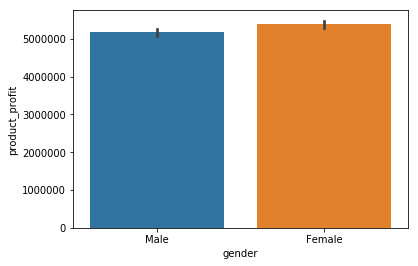

In [148]:
# gender against profit
sns.barplot(x='gender', y='product_profit', data=cust_trans_appr, estimator=sum, order=['Male', 'Female'])
plt.show()

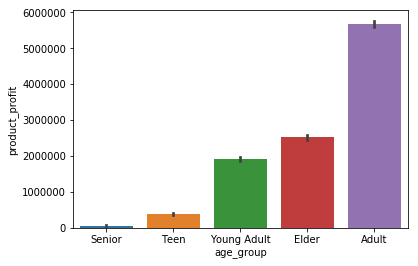

In [147]:
# age group against profit
sns.barplot(x='age_group', y='product_profit', data=cust_trans_appr, estimator=sum, order=['Senior', 'Teen', 'Young Adult', 'Elder', 'Adult'])
plt.show()

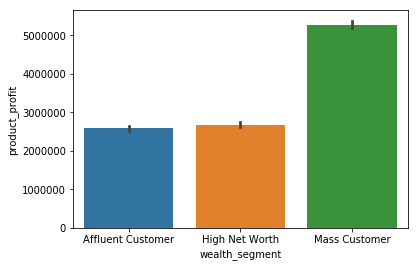

In [150]:
# wealth segment against profit
sns.barplot(x='wealth_segment', y='product_profit', data=cust_trans_appr, estimator=sum, order=['Affluent Customer', 'High Net Worth', 'Mass Customer'])
plt.show()

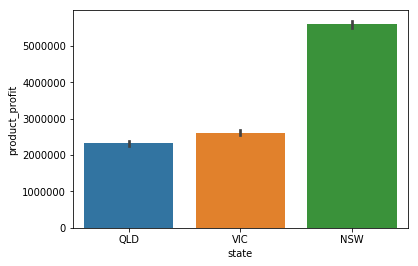

In [152]:
# state segment against profit
sns.barplot(x='state', y='product_profit', data=cust_trans_appr, estimator=sum, order=['QLD', 'VIC', 'NSW'])
plt.show()

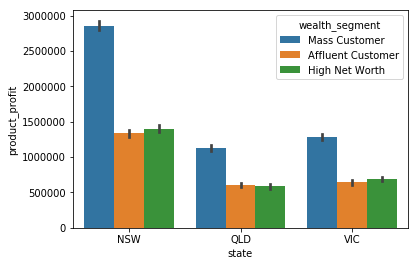

In [156]:
# state and wealth segment against profit
sns.barplot(x='state', y='product_profit', hue='wealth_segment', data=cust_trans_appr, estimator=sum)
plt.show()

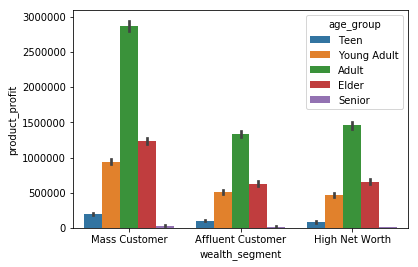

In [157]:
# wealth segment and age group against profit
sns.barplot(x='wealth_segment', y='product_profit', hue='age_group', data=cust_trans_appr, estimator=sum)
plt.show()

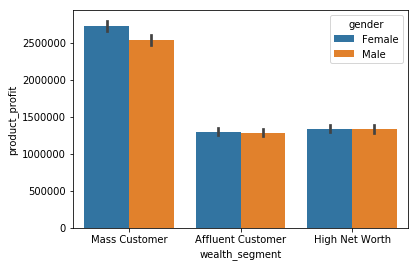

In [159]:
# wealth segment and age group against profit
sns.barplot(x='wealth_segment', y='product_profit', hue='gender', data=cust_trans_appr, estimator=sum)
plt.show()

**I had to move visualization to Tableau as Seaborn doesn't support using multiple variables in its 'hue' parameter**

### Estimating population mean difference between the two best 4-factor demograpics, using confidence interval with a 95% confidence level.

In [164]:
cust_trans_appr.head()

,customer_id,gender,wealth_segment,age,age_group,state,brand,product_line,product_class,product_size,list_price,standard_cost,product_profit
0,1,Female,Mass Customer,65.0,Senior,NSW,OHM Cycles,Standard,medium,medium,235.63,125.07,110.56
1,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,1577.53,826.51,751.02
2,1,Female,Mass Customer,65.0,Senior,NSW,Trek Bicycles,Road,low,small,1720.70,1531.42,189.28
3,1,Female,Mass Customer,65.0,Senior,NSW,Norco Bicycles,Standard,medium,medium,360.40,270.30,90.10
4,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,71.49,53.62,17.87


In [165]:
# to subset the data that contain the top 2 overall demographics - NSW-Mass Customer-Adult-Females/Males
keep = ['customer_id', 'gender', 'wealth_segment', 'age', 'age_group', 'state', 'product_profit']
nsw = cust_trans_appr.loc[cust_trans_appr['state']=='NSW', keep]
set(nsw.state)

{'NSW'}

In [167]:
nsw_mass = nsw.loc[nsw['wealth_segment']=='Mass Customer', keep]
set(nsw_mass['wealth_segment'])

{'Mass Customer'}

In [169]:
nsw_mass_adult = nsw_mass.loc[nsw_mass.age_group=='Adult', keep]
nsw_mass_adult['age_group'].unique()

[Adult]
Categories (1, object): [Adult]

In [208]:
nsw_mass_adult_male = nsw_mass_adult.loc[nsw_mass_adult['gender']=='Male', keep]
nsw_mass_adult_female = nsw_mass_adult.loc[nsw_mass_adult['gender']=='Female', keep]
nsw_mass_adult_male.head()

,customer_id,gender,wealth_segment,age,age_group,state,product_profit
11,2,Male,Mass Customer,38.0,Adult,NSW,448.68
12,2,Male,Mass Customer,38.0,Adult,NSW,547.28
13,2,Male,Mass Customer,38.0,Adult,NSW,1230.30
82,16,Male,Mass Customer,41.0,Adult,NSW,1702.55
83,16,Male,Mass Customer,41.0,Adult,NSW,641.64


In [209]:
nsw_mass_adult_female.head()

,customer_id,gender,wealth_segment,age,age_group,state,product_profit
143,26,Female,Mass Customer,40.0,Adult,NSW,129.01
144,26,Female,Mass Customer,40.0,Adult,NSW,139.23
158,29,Female,Mass Customer,50.0,Adult,NSW,471.60
159,29,Female,Mass Customer,50.0,Adult,NSW,139.23
160,29,Female,Mass Customer,50.0,Adult,NSW,75.48


In [175]:
nsw_mass_adult_male.describe()

,customer_id,age,product_profit
count,1317.000000,1317.000000,1317.000000
mean,1755.646925,40.018223,555.673386
std,1069.791694,5.360383,490.267191
min,2.000000,30.000000,4.800000
25%,757.000000,37.000000,139.230000
50%,1665.000000,40.000000,445.210000
75%,2691.000000,43.000000,827.160000
max,3499.000000,50.000000,1702.550000


In [181]:
ma_mean = 555.673386
s1 = 490.267191
n1 = len(nsw_mass_adult_male)

In [182]:
fe_mean = 547.298481
s2 = 492.317942
n2 = len(nsw_mass_adult_female)

In [183]:
mean_diff = ma_mean - fe_mean
t_star = 1.98
se = np.sqrt((((n1-1) * s1**2) + ((n2-1) * s2**2)) / (n1 + n2 - 2)) * np.sqrt((1 / n1) + (1 / n2))

In [184]:
se

18.24973196658795

In [187]:
lcb = mean_diff - t_star * se
ucb = mean_diff + t_star * se
lcb, ucb

(-27.75956429384413, 44.509374293844154)

In [2]:
# import statsmodels library
from statsmodels.stats.weightstats import zconfint

In [188]:
# Using statsmodel
zconfint(x1=nsw_mass_adult_male['product_profit'], x2=nsw_mass_adult_female['product_profit'], usevar='pooled')

(-27.393911986527073, 44.14372277312678)

## DONE